<a href="https://colab.research.google.com/github/zhengwen0425/Predictive-Analysis-of-COVID-19-Hospitalizations-in-Los-Angeles-County/blob/main/Predicting_COVID_19_Hospitalizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following list shows four sources of data that can be useful for predicting hospitalizations:

Historical data of LA County COVID-19 hospitalizations (https://data.chhs.ca.gov/dataset/covid-19-hospital-data)

Historical data of COVID-19 Cases and Deaths in LA County (https://data.chhs.ca.gov/dataset/covid-19-time-series-metrics-bycounty-
and-state)

Historical data of COVID-19 Vaccinations in LA County (https://data.chhs.ca.gov/dataset/covid-19-vaccine-progress-dashboarddata-
by-zip-code)

The dates of US public holidays (these can be accessed via Google)

You can download the latest versions of these datasets from the provided links.Better yet, if the same datasets are available where you live, do the
predictive analysis for your local government.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
url_hops = 'https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter16/covid19hospitalbycounty.csv'
day_hosp_df = pd.read_csv(url_hops)
day_hosp_df.head()

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Del Norte,2020-03-29,1.0,2.0,NaN,NaN,0.0,0.0,3.0
1,Lassen,2020-03-29,0.0,2.0,NaN,NaN,0.0,0.0,NaN
2,Riverside,2020-03-29,44.0,78.0,NaN,NaN,13.0,20.0,46.0
3,Tehama,2020-03-29,0.0,0.0,NaN,NaN,0.0,0.0,2.0
4,Sutter,2020-03-29,0.0,0.0,NaN,NaN,0.0,0.0,NaN


In [3]:
url_case = 'https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter16/covid19cases_test.csv'
day_case_df = pd.read_csv(url_case)
day_case_df

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37327,2021-09-30,Yuba,County,79290.0,29.0,9445.0,0.0,49.0,316.0,106071,33.0,10885,19.0,9370.0,0.0,66.0,381.0
37328,2021-10-01,Yuba,County,79290.0,11.0,9456.0,0.0,49.0,138.0,106209,11.0,10896,0.0,9370.0,0.0,66.0,NaN
37329,2021-10-02,Yuba,County,79290.0,4.0,9460.0,0.0,49.0,48.0,106257,8.0,10904,0.0,9370.0,0.0,66.0,NaN
37330,2021-10-03,Yuba,County,79290.0,0.0,9460.0,0.0,49.0,NaN,106257,NaN,10904,92.0,9462.0,2.0,68.0,1320.0


In [6]:
url_vax ='https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter16/covid19vaccinesbyzipcode_test.csv'
day_vax_df = pd.read_csv(url_vax)
day_vax_df.head()

,as_of_date,zip_code_tabulation_area,local_health_jurisdiction,county,vaccine_equity_metric_quartile,vem_source,age12_plus_population,persons_fully_vaccinated,persons_partially_vaccinated,percent_of_population_fully_vaccinated,percent_of_population_partially_vaccinated,percent_of_population_with_1_plus_dose,redacted
0,2021-01-05,92284,San Bernardino,San Bernardino,1.0,Healthy Places Index Score,22254.9,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
1,2021-01-05,92841,Orange,Orange,2.0,Healthy Places Index Score,29342.3,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
2,2021-01-05,92614,Orange,Orange,4.0,Healthy Places Index Score,23212.5,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
3,2021-01-05,92346,San Bernardino,San Bernardino,2.0,Healthy Places Index Score,52408.8,NaN,NaN,NaN,NaN,NaN,Information redacted in accordance with CA sta...
4,2021-01-05,92354,San Bernardino,San Bernardino,2.0,Healthy Places Index Score,19546.6,48.0,2060.0,0.002456,0.105389,0.107845,No


# **Designing the Dataset that supports the prediction**

In defining the attributes in the following list, we have used the t variable to represent time. For
instance, t0 shows t=0, and the attribute shows information about the same day as the row:

n_Hosp_t0: The number of hospitalizations at t=0

s_Hosp_tn7_0: The slope of the curve of hospitalizations for the period t=-7 to t=0

Bn_days_MajHol: The number of days from the previous major holiday

av7_Case_tn6_0: The seven-day average of the number of cases for the period t=-6 to t=0

s_Case_tn14_0: The slope of the curve of cases for the period t=-14 to t=0

av7_Death_tn6_0: The seven-day average of the number of deaths for the period t=-6 to t=0

s_Death_tn14_0: The slope of the curve of deaths for the period t=-14 to t=0

p_FullVax_t0: The percentage of fully vaccinated people at t=0

s_FullVax_tn14_0: The slope of the curve of the percentage of fully vaccinated people for the period t=-14 to t=0

In [7]:
day_df = pd.DataFrame(index = range(len(day_hosp_df.todays_date.unique())),
                      columns=['t0','n_Hosp_t0','s_Hosp_tn7_0',
                              'n_days_MajHol',
                               'av7_Case_tn6_0','s_Case_tn14_0',
                               'av7_Death_tn6_0','s_Death_tn14_0',
                               'p_FullVax_t0','s_FullVax_tn14_0',
                               'n_Hosp_t14'])

In [8]:
day_df.t0 = pd.to_datetime(day_hosp_df.todays_date.unique(),format="%Y-%m-%d")

# **Filling up the placeholder**

to make the connections between the data sources some data cleaning is needed. The major one is to make sure all of the rows in day_hosp_df, day_case_df, day_vax_df, and even the placeholder day_df is to index the DataFrames with the datetime version of the dates. Those dates will provide seamless connections between the data sources.

In [9]:
day_hosp_df.todays_date = pd.to_datetime(day_hosp_df.todays_date,
                                      format="%Y-%m-%d")
day_hosp_df.set_index('todays_date',drop=False,inplace=True)

In [11]:
day_case_df.date = pd.to_datetime(day_case_df.date,
                                      format="%Y-%m-%d")
day_case_df.set_index('date',drop=False,inplace=True)

In [12]:
BM = day_case_df.area =='Los Angeles'
day_case_df = pd.DataFrame(day_case_df[BM])
day_case_df.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
date,,,,,,,,,,,,,,,,,
2020-02-01,2020-02-01,Los Angeles,County,10257557.0,14.0,14.0,0.0,0.0,283.0,283,9.0,9,1.0,1.0,0.0,0.0,NaN
2020-02-02,2020-02-02,Los Angeles,County,10257557.0,1.0,15.0,0.0,0.0,23.0,306,1.0,10,0.0,1.0,0.0,0.0,NaN
2020-02-03,2020-02-03,Los Angeles,County,10257557.0,2.0,17.0,0.0,0.0,14.0,320,1.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-04,2020-02-04,Los Angeles,County,10257557.0,0.0,17.0,0.0,0.0,3.0,323,0.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-05,2020-02-05,Los Angeles,County,10257557.0,1.0,18.0,0.0,0.0,2.0,325,0.0,11,0.0,1.0,0.0,0.0,NaN


In [13]:
BM = day_case_df.area =='Los Angeles'
day_case_df = pd.DataFrame(day_case_df[BM])
day_case_df.head()

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
date,,,,,,,,,,,,,,,,,
2020-02-01,2020-02-01,Los Angeles,County,10257557.0,14.0,14.0,0.0,0.0,283.0,283,9.0,9,1.0,1.0,0.0,0.0,NaN
2020-02-02,2020-02-02,Los Angeles,County,10257557.0,1.0,15.0,0.0,0.0,23.0,306,1.0,10,0.0,1.0,0.0,0.0,NaN
2020-02-03,2020-02-03,Los Angeles,County,10257557.0,2.0,17.0,0.0,0.0,14.0,320,1.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-04,2020-02-04,Los Angeles,County,10257557.0,0.0,17.0,0.0,0.0,3.0,323,0.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-05,2020-02-05,Los Angeles,County,10257557.0,1.0,18.0,0.0,0.0,2.0,325,0.0,11,0.0,1.0,0.0,0.0,NaN


In [14]:
day_vax_df = pd.DataFrame(day_vax_df.groupby(['as_of_date','county']).percent_of_population_fully_vaccinated.mean()).reset_index()

In [16]:
BM = day_vax_df.county== 'Los Angeles'
day_vax_df = pd.DataFrame(day_vax_df[BM]).reset_index(drop=True)
day_vax_df.head()

,as_of_date,county,percent_of_population_fully_vaccinated
0,2021-01-05,Los Angeles,0.000651
1,2021-01-12,Los Angeles,0.011924
2,2021-01-19,Los Angeles,0.016121
3,2021-01-26,Los Angeles,0.020387
4,2021-02-02,Los Angeles,0.027631


In [19]:
day_vax_df.as_of_date = pd.to_datetime(day_vax_df.as_of_date, format="%Y-%m-%d")
day_vax_df.drop(columns =['county'],inplace=True)
day_vax_df.columns = ['Date', 'percent_of_population_fully_vaccinated']
day_vax_df.head()

,Date,percent_of_population_fully_vaccinated
0,2021-01-05,0.000651
1,2021-01-12,0.011924
2,2021-01-19,0.016121
3,2021-01-26,0.020387
4,2021-02-02,0.027631


In [20]:
dates_toadd = list(set(day_hosp_df.todays_date)^set(day_vax_df.Date))

In [21]:
df_toadd = pd.DataFrame(pd.Series({i:np.nan for i in dates_toadd})).reset_index()
df_toadd.columns = ['Date', 'percent_of_population_fully_vaccinated']
df_toadd

,Date,percent_of_population_fully_vaccinated
0,2020-06-13,NaN
1,2020-07-12,NaN
2,2020-08-11,NaN
3,2021-02-19,NaN
4,2021-03-22,NaN
...,...,...
510,2021-09-13,NaN
511,2021-08-25,NaN
512,2021-09-30,NaN
513,2021-03-14,NaN


In [23]:
day_vax_df = pd.concat([day_vax_df,df_toadd]).sort_values(by='Date').reset_index(drop=True)
day_vax_df.set_index('Date',drop=False,inplace=True)
day_vax_df.loc[day_vax_df.loc[:'2021-01-04'].index,'percent_of_population_fully_vaccinated']=0
day_vax_df.interpolate(method='ffill',inplace=True)
day_vax_df.head(5)

,Date,percent_of_population_fully_vaccinated
Date,,
2020-03-29,2020-03-29,0.0
2020-03-30,2020-03-30,0.0
2020-03-31,2020-03-31,0.0
2020-04-01,2020-04-01,0.0
2020-04-02,2020-04-02,0.0
2020-04-03,2020-04-03,0.0
2020-04-04,2020-04-04,0.0
2020-04-05,2020-04-05,0.0
2020-04-06,2020-04-06,0.0


<Axes: xlabel='Date'>

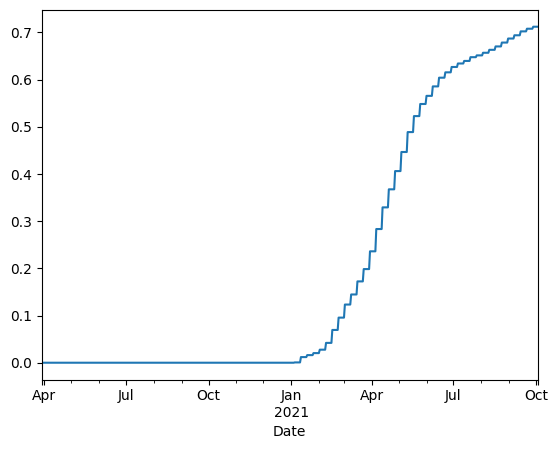

In [24]:
day_vax_df.percent_of_population_fully_vaccinated.plot()

After that, we will use what we have learned in this book to, one by one, fill the columns in the placeholder day_df.

# **Fill n_Hosp_t0**

In [25]:
BM = day_hosp_df.county == 'Los Angeles'
wdf = pd.DataFrame(day_hosp_df[BM]).set_index('todays_date')
wdf.head()

,county,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
todays_date,,,,,,,,
2020-03-29,Los Angeles,489.0,1132.0,NaN,NaN,191.0,182.0,345.0
2020-03-30,Los Angeles,601.0,1277.0,NaN,NaN,245.0,244.0,456.0
2020-03-31,Los Angeles,713.0,1239.0,NaN,NaN,315.0,239.0,445.0
2020-04-01,Los Angeles,739.0,1332.0,NaN,NaN,335.0,220.0,492.0
2020-04-02,Los Angeles,818.0,1270.0,NaN,NaN,346.0,193.0,488.0


In [26]:
day_df.n_Hosp_t0 = wdf.reset_index().hospitalized_covid_confirmed_patients
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
0,2020-03-29,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-30,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-31,713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-01,739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-02,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='t0'>

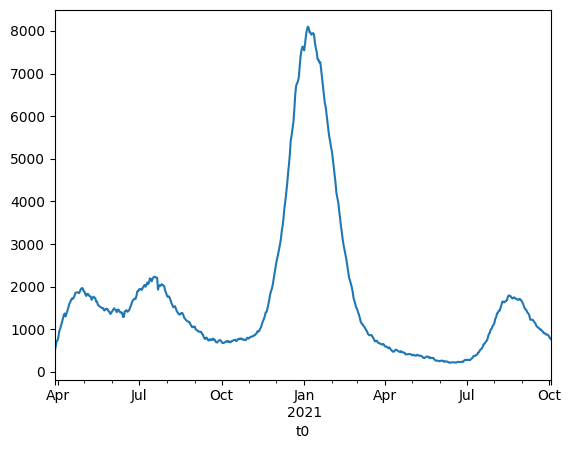

In [27]:
day_df.set_index('t0',drop=False,inplace=True)
day_df.n_Hosp_t0.plot()

# **Fill n_Hosp_t14**

In [28]:
import datetime
def Retrieven_Hosp_t14(row):
    date_t0 = row.t0
    date_t14 = date_t0 + datetime.timedelta(days=14)
    #print(date_t14)
    if(date_t14 < day_df.iloc[-1].t0):
        return day_df.loc[date_t14].n_Hosp_t0

In [29]:
day_df.n_Hosp_t14 = day_df.apply(Retrieven_Hosp_t14,axis=1)
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1679.0


# **Fill s_Hosp_tn7_0**

In [30]:
def linearFunction(t,a,b):
    y = a+ b*t
    return y

In [31]:
import datetime
from scipy.optimize import curve_fit
def Retrieve_s_Hosp_tn7_0(row):
    date_t0 = row.t0
    date_t_n7 = date_t0 - datetime.timedelta(days=7)
    if(date_t_n7 >= day_df.iloc[0].t0):
        x_data = range(8)
        y_data = day_df.loc[date_t_n7:date_t0].n_Hosp_t0
        p,c= curve_fit(linearFunction, x_data, y_data)
        ## Uncomment and run if you want to see the curve fitting, Caveat: it will increase runtime
        #fit_y = linearFunction(x_data,p[0],p[1])
        #plt.plot(x_data,y_data,label='data' )
        #plt.plot(x_data, fit_y, '--', label='fit')
        #plt.xticks(x_data,y_data.index)
        #plt.legend()
        #plt.show()
        return p[1]

In [32]:
day_df.s_Hosp_tn7_0 = day_df.apply(Retrieve_s_Hosp_tn7_0,axis=1)
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1679.0


<Axes: xlabel='t0'>

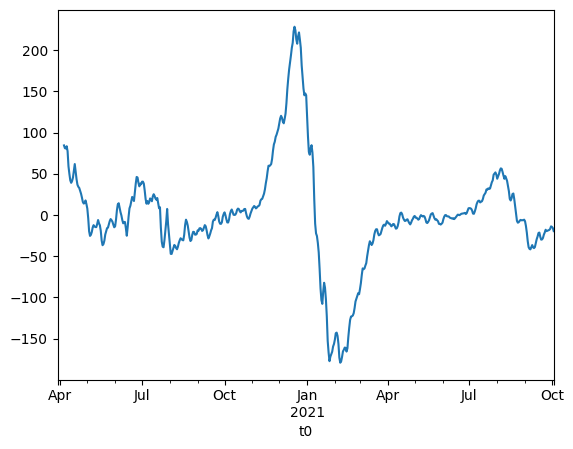

In [33]:
day_df.s_Hosp_tn7_0.plot()

# **Fill n_days_MajHol**

In [34]:
dic_holidays={'Martin Luther King Jr. Day':'01/20/2020','Martin Luther King Jr. Day2':'01/21/2020',
             'Martin Luther King Jr. Day3':'01/22/2020',
             'Memorial day1': '05/23/2020','Memorial day2': '05/24/2020','Memorial day3': '05/25/2020',
             'Independence day1': '07/03/2020','Independence day2': '07/04/2020','Independence day3': '07/03/2020',
             'Labor day1': '09/05/2020','Labor day2': '09/06/2020','Labor day3': '09/07/2020',
             'Thanksgiving1': '11/26/2020', 'Thanksgiving2': '11/27/2020','Thanksgiving3': '11/28/2020',
             'Thanksgiving4': '11/29/2020', 'Christmas1': '12/25/2020', 'Christmas2': '12/26/2020',
             'Christmas3': '12/27/2020', 'Christmas4': '12/28/2020','Christmas5': '12/29/2020',
             'Christmas6': '12/30/2020', 'New Year Day': '01/01/2021','New Year Day2': '01/02/2021',
             'New Year Day3': '01/03/2021',
             'Martin Luther King Jr. Day_2021':'01/18/2021','Martin Luther King Jr. Day2_2021':'01/19/2021',
             'Martin Luther King Jr. Day3_2021':'01/20/2021',
             'Memorial day1_2021': '05/31/2021','Memorial day2_2021': '06/01/2021','Memorial day3_2021': '06/02/2021',
             'Independence day1_2021': '07/05/2021','Independence day2_2021': '07/06/2021',
             'Independence day3_2021': '07/07/2021',
             'Labor day1_2021': '09/06/2021','Labor day2_2021': '09/07/2021','Labor day3_2021': '09/08/2021'}
dic_holidays

{'Martin Luther King Jr. Day': '01/20/2020',
 'Martin Luther King Jr. Day2': '01/21/2020',
 'Martin Luther King Jr. Day3': '01/22/2020',
 'Memorial day1': '05/23/2020',
 'Memorial day2': '05/24/2020',
 'Memorial day3': '05/25/2020',
 'Independence day1': '07/03/2020',
 'Independence day2': '07/04/2020',
 'Independence day3': '07/03/2020',
 'Labor day1': '09/05/2020',
 'Labor day2': '09/06/2020',
 'Labor day3': '09/07/2020',
 'Thanksgiving1': '11/26/2020',
 'Thanksgiving2': '11/27/2020',
 'Thanksgiving3': '11/28/2020',
 'Thanksgiving4': '11/29/2020',
 'Christmas1': '12/25/2020',
 'Christmas2': '12/26/2020',
 'Christmas3': '12/27/2020',
 'Christmas4': '12/28/2020',
 'Christmas5': '12/29/2020',
 'Christmas6': '12/30/2020',
 'New Year Day': '01/01/2021',
 'New Year Day2': '01/02/2021',
 'New Year Day3': '01/03/2021',
 'Martin Luther King Jr. Day_2021': '01/18/2021',
 'Martin Luther King Jr. Day2_2021': '01/19/2021',
 'Martin Luther King Jr. Day3_2021': '01/20/2021',
 'Memorial day1_2021': 

In [35]:
holiday_sr=pd.Series(dic_holidays,name='Date')

In [36]:
holiday_sr = pd.to_datetime(holiday_sr,format="%m/%d/%Y")
holiday_sr.sort_values()

Martin Luther King Jr. Day         2020-01-20
Martin Luther King Jr. Day2        2020-01-21
Martin Luther King Jr. Day3        2020-01-22
Memorial day1                      2020-05-23
Memorial day2                      2020-05-24
Memorial day3                      2020-05-25
Independence day3                  2020-07-03
Independence day1                  2020-07-03
Independence day2                  2020-07-04
Labor day1                         2020-09-05
Labor day2                         2020-09-06
Labor day3                         2020-09-07
Thanksgiving1                      2020-11-26
Thanksgiving2                      2020-11-27
Thanksgiving3                      2020-11-28
Thanksgiving4                      2020-11-29
Christmas1                         2020-12-25
Christmas2                         2020-12-26
Christmas3                         2020-12-27
Christmas4                         2020-12-28
Christmas5                         2020-12-29
Christmas6                        

In [37]:
t0 = day_df.iloc[0].t0

wsr = pd.concat([holiday_sr,pd.Series({'This one':t0})]).sort_values()
wdf = pd.DataFrame(wsr).reset_index(drop=False)
wdf.columns=['name','Date']
wdf

,name,Date
0,Martin Luther King Jr. Day,2020-01-20
1,Martin Luther King Jr. Day2,2020-01-21
2,Martin Luther King Jr. Day3,2020-01-22
3,This one,2020-03-29
4,Memorial day1,2020-05-23
5,Memorial day2,2020-05-24
6,Memorial day3,2020-05-25
7,Independence day1,2020-07-03
8,Independence day3,2020-07-03
9,Independence day2,2020-07-04


In [38]:
def Retrieve_n_days_MajHol(row):
    wsr = pd.concat([holiday_sr,
                     pd.Series({'This one':row.t0})]).sort_values()
    wdf = pd.DataFrame(wsr).reset_index(drop=False)
    wdf.columns=['name','Date']
    BM = wdf.name == 'This one'
    t_holiday = wdf.iloc[wdf[BM].index-1].Date.iloc[0]
    return((row.t0-t_holiday).days)

In [39]:
day_df.n_days_MajHol = day_df.apply(Retrieve_n_days_MajHol,axis=1)

In [40]:
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,1679.0


# **Fill av7_Case_tn6_0**

In [41]:
import datetime
def Retrieve_av7_Case_tn6_0(row):
    date_t0 = row.t0
    date_t_n6 = date_t0 - datetime.timedelta(days=6)
    if(date_t_n6 >= day_df.iloc[0].t0):
        return(day_case_df.loc[date_t_n6:date_t0].cases.mean())

<Axes: xlabel='t0'>

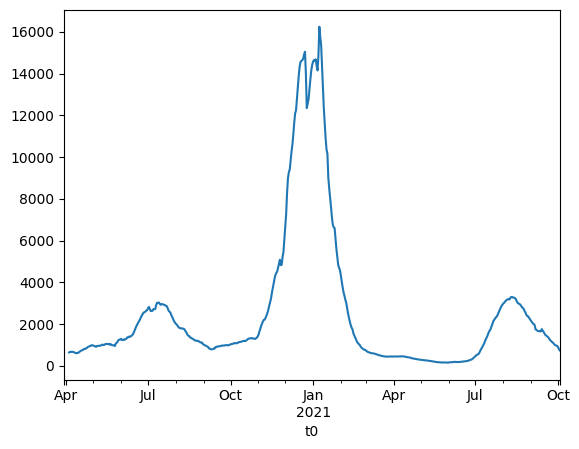

In [42]:
day_df.av7_Case_tn6_0 = day_df.apply(Retrieve_av7_Case_tn6_0,axis=1)
day_df.av7_Case_tn6_0.plot()

# **Fill s_Case_tn14_0**

In [43]:
import datetime
def Retrieve_s_Case_tn14_0(row):
    date_t0 = row.t0
    date_t_n14 = date_t0 - datetime.timedelta(days=14)
    if(date_t_n14 >= day_df.iloc[0].t0):
        x_data = range(15)
        y_data = day_case_df.loc[date_t_n14:date_t0].cases
        p,c= curve_fit(linearFunction, x_data, y_data)
        ## Uncomment and run if you want to see the curve fitting, Caveat: it will increase runtime
        #fit_y = linearFunction(x_data,p[0],p[1])
        #plt.plot(x_data,y_data,label='data' )
        #plt.plot(x_data, fit_y, '--', label='fit')
        #plt.xticks(x_data,y_data.index)
        #plt.legend()
        #plt.show()
        return p[1]

<Axes: xlabel='t0'>

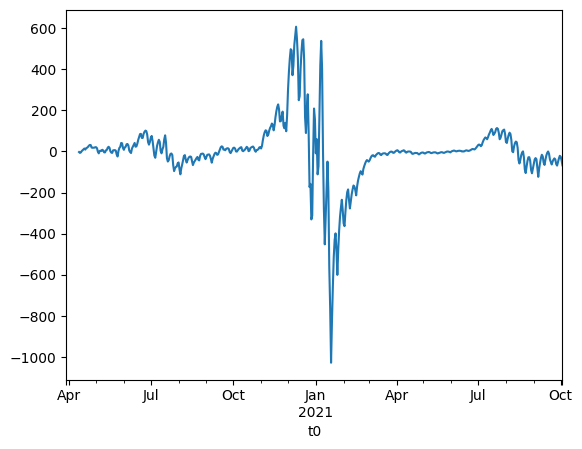

In [44]:
day_df.s_Case_tn14_0 = day_df.apply(Retrieve_s_Case_tn14_0,axis=1)
day_df.s_Case_tn14_0.plot()

In [45]:
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,1679.0


# **Fill av7_Death_tn6_0**

In [46]:
import datetime
def Retrieve_av7_Death_tn6_0(row):
    date_t0 = row.t0
    date_t_n6 = date_t0 - datetime.timedelta(days=6)
    if(date_t_n6 >= day_df.iloc[0].t0):
        return(day_case_df.loc[date_t_n6:date_t0].deaths.mean())

<Axes: xlabel='t0'>

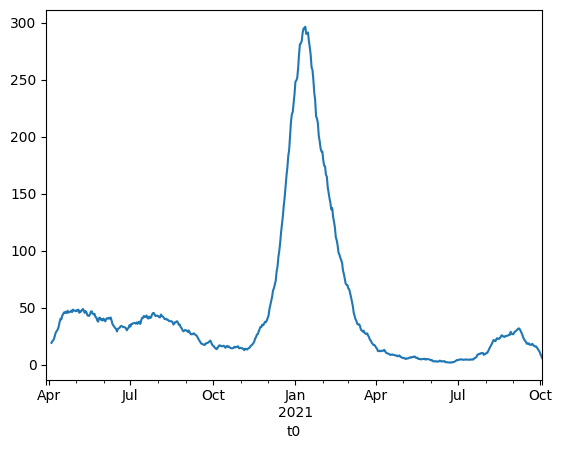

In [47]:
day_df.av7_Death_tn6_0 = day_df.apply(Retrieve_av7_Death_tn6_0,axis=1)
day_df.av7_Death_tn6_0.plot()

In [48]:
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,1679.0


# **Fill s_Death_tn14_0**

In [49]:
import datetime
def Retrieve_s_Deat_tn14_0(row):
    date_t0 = row.t0
    date_t_n14 = date_t0 - datetime.timedelta(days=14)
    if(date_t_n14 >= day_df.iloc[0].t0):
        x_data = range(15)
        y_data = day_case_df.loc[date_t_n14:date_t0].deaths
        p,c= curve_fit(linearFunction, x_data, y_data)
        ## Uncomment and run if you want to see the curve fitting, Caveat: it will increase runtime
        #fit_y = linearFunction(x_data,p[0],p[1])
        #plt.plot(x_data,y_data,label='data' )
        #plt.plot(x_data, fit_y, '--', label='fit')
        #plt.xticks(x_data,y_data.index)
        #plt.legend()
        #plt.show()
        return p[1]

<Axes: xlabel='t0'>

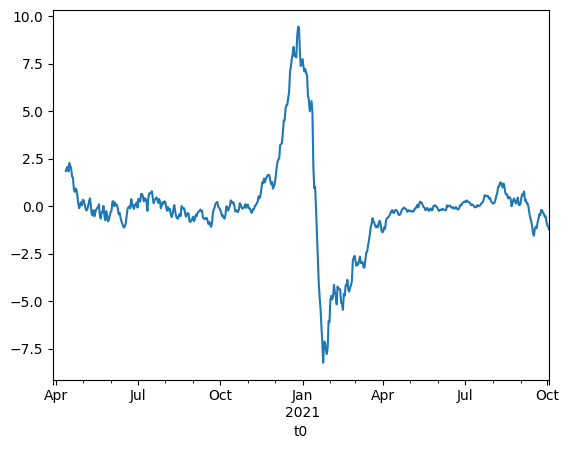

In [50]:
day_df.s_Death_tn14_0 = day_df.apply(Retrieve_s_Deat_tn14_0,axis=1)
day_df.s_Death_tn14_0.plot()

In [51]:
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,1679.0


# **Fil p_FullVax_t0**

In [52]:
def Retrieve_p_FullVax_t0(row):
    date_t0 = row.t0
    return(day_vax_df.loc[date_t0].percent_of_population_fully_vaccinated)

In [53]:
day_df.p_FullVax_t0 = day_df.apply(Retrieve_p_FullVax_t0,axis=1)
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,NaN,NaN,NaN,NaN,0.0,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,NaN,NaN,NaN,NaN,0.0,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,NaN,NaN,NaN,NaN,0.0,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,NaN,NaN,NaN,NaN,0.0,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,NaN,NaN,NaN,NaN,0.0,NaN,1679.0


<Axes: xlabel='t0'>

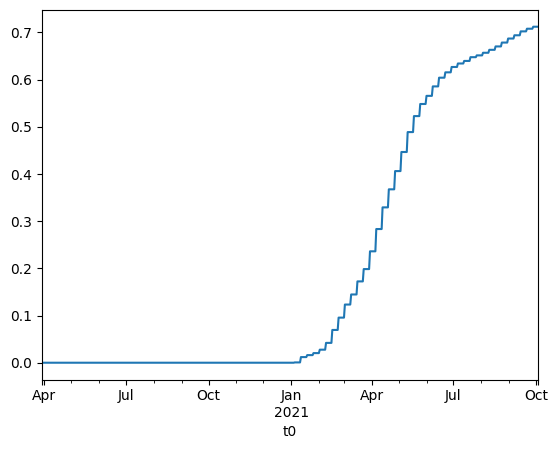

In [54]:
day_df.p_FullVax_t0.plot()

# **Fill s_FullVax_tn14_0**

In [55]:
import datetime
def Retrieve_s_FullVax_tn14_0(row):
    date_t0 = row.t0
    date_t_n14 = date_t0 - datetime.timedelta(days=14)
    if(date_t_n14 >= day_df.iloc[0].t0):
        x_data = range(15)
        y_data = day_vax_df.loc[date_t_n14:date_t0].percent_of_population_fully_vaccinated
        p,c= curve_fit(linearFunction, x_data, y_data)
        ## Uncomment and run if you want to see the curve fitting, Caveat: it will increase runtime
        #if(p[1]>0):
        #    fit_y = linearFunction(x_data,p[0],p[1])
        #    plt.plot(x_data,y_data,label='data' )
        #    plt.plot(x_data, fit_y, '--', label='fit')
        #    plt.xticks(x_data,y_data.index)
        #    plt.legend()
        #    plt.show()
        return p[1]

<Axes: xlabel='t0'>

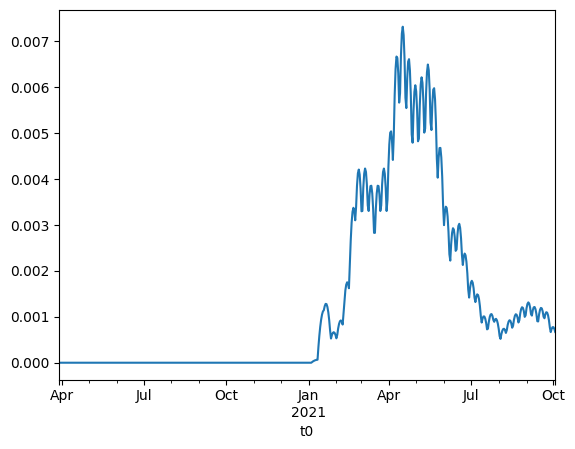

In [56]:
day_df.s_FullVax_tn14_0 = day_df.apply(Retrieve_s_FullVax_tn14_0,axis=1)
day_df.s_FullVax_tn14_0.fillna(0,inplace=True)
day_df.s_FullVax_tn14_0.plot()

In [57]:
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,NaN,NaN,NaN,NaN,0.0,0.0,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,NaN,NaN,NaN,NaN,0.0,0.0,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,NaN,NaN,NaN,NaN,0.0,0.0,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,NaN,NaN,NaN,NaN,0.0,0.0,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,NaN,NaN,NaN,NaN,0.0,0.0,1679.0


# **Supervised Dimension Reduction**

# **Linear Regression**

In [58]:
import statsmodels.api as sm

Xs = day_df.dropna().drop(columns=['n_Hosp_t14','t0'])
Xs = sm.add_constant(Xs)

y = day_df.dropna().n_Hosp_t14

sm.OLS(y, Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_Hosp_t14   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2939.
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:59:10   Log-Likelihood:                -3653.3
No. Observations:                 525   AIC:                             7327.
Df Residuals:                     515   BIC:                             7369.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              317.1997     35.248      8.999      0.000     247.953     386.447
n_Hosp_t0            0.6326      0.053     11.905      0.000       0.528       0.737
s_Hosp_tn7_0         8.8469      0.646     13.686      0.000       7.577      10.117
n_days_MajHol        0.6689      0.424      1.577      0.115      -0.164       1.502
av7_Case_tn6_0       0.2515      0.017     14.998      0.000       0.219       0.284
s_Case_tn14_0        0.5100      0.130      3.910      0.000       0.254       0.766
av7_Death_tn6_0     -5.2166      1.334     -3.912      0.000      -7.837      -2.597
s_Death_tn14_0    -133.8255     12.420    -10.775      0.000    -158.226    -109.425
p_FullVax_t0      -489.3931     57.911     -8.451      0.000    -603.164    -375.622
s_FullVax_tn14_0 -1.068e+04   8953.227     -1.193      0.234   -2.83e+04    6911.792
==============================================================================
Omnibus:                       27.383   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.870
Skew:                           0.211   Prob(JB):                     1.11e-15
Kurtosis:                       4.724   Cond. No.                     4.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-values for all
of the other independent attributes – except n_days_MajHol and s_FullVax_tn14_0 – are very small,
indicating the rejection of the null hypothesis.

In [59]:
import statsmodels.api as sm

Xs = day_df.dropna().drop(columns=['n_Hosp_t14','t0','s_FullVax_tn14_0','n_days_MajHol'])
Xs = sm.add_constant(Xs)

y = day_df.dropna().n_Hosp_t14

sm.OLS(y, Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_Hosp_t14   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     3773.
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:01:09   Log-Likelihood:                -3654.7
No. Observations:                 525   AIC:                             7325.
Df Residuals:                     517   BIC:                             7359.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             335.7986     28.334     11.852      0.000     280.135     391.462
n_Hosp_t0           0.6614      0.047     13.958      0.000       0.568       0.755
s_Hosp_tn7_0        8.7941      0.634     13.863      0.000       7.548      10.040
av7_Case_tn6_0      0.2428      0.016     15.316      0.000       0.212       0.274
s_Case_tn14_0       0.5247      0.130      4.031      0.000       0.269       0.780
av7_Death_tn6_0    -5.7624      1.190     -4.844      0.000      -8.099      -3.425
s_Death_tn14_0   -128.4148     11.926    -10.768      0.000    -151.843    -104.986
p_FullVax_t0     -526.6655     49.584    -10.622      0.000    -624.077    -429.254
==============================================================================
Omnibus:                       23.469   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.467
Skew:                           0.185   Prob(JB):                     1.49e-12
Kurtosis:                       4.534   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Random Forest**

In [60]:
from sklearn.ensemble import RandomForestRegressor

Xs = day_df.dropna().drop(columns=['n_Hosp_t14','t0'])
y = day_df.dropna().n_Hosp_t14

rf = RandomForestRegressor(n_estimators=3000)
rf.fit(Xs, y)

RandomForestRegressor(n_estimators=3000)

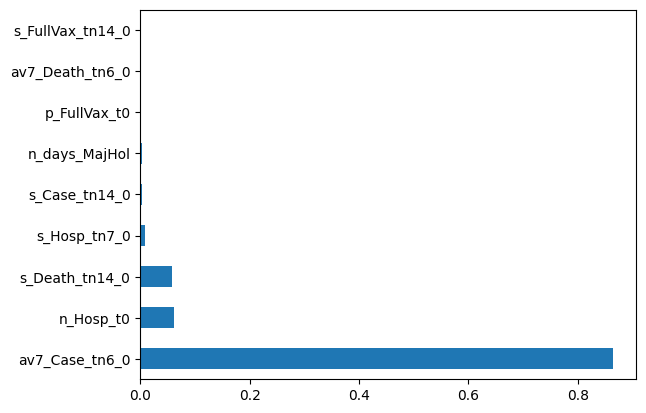

In [61]:
importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.show()

unlike our conclusion we arrive at under Linear Regression, only four
independent attributes are among the most important attributes, and the rest has not given any sizable
share of importance.

# **Decision Trees**

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'criterion':['mse','friedman_mse','mae','squared_error','absolute_error','poisson'],
    'splitter' : ['best','random'],
    'max_depth': [10, 20, 40, 50, 60],
    'min_samples_split': [5, 10, 20, 30, 40],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(Xs, y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  -2522424.2390476195
Best parameters:  {'criterion': 'absolute_error', 'max_depth': 50, 'min_impurity_decrease': 0.0005, 'min_samples_split': 5, 'splitter': 'random'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2500 fits failed out of a total of 7500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _

In [63]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
import graphviz
dt = DecisionTreeRegressor(criterion=gridSearch.best_params_['criterion'],
                           splitter=gridSearch.best_params_['splitter'],
                           max_depth=gridSearch.best_params_['max_depth'],
                           min_samples_split = gridSearch.best_params_['min_samples_split'],
                           min_impurity_decrease = gridSearch.best_params_['min_impurity_decrease'])
dt.fit(Xs, y)

dot_data = export_graphviz(dt,
                           out_file=None,
                           feature_names=Xs.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(filename='HospDT')

'HospDT.pdf'

# **The Analysis**

In [64]:
BM1 = day_df.s_Death_tn14_0.isna()
BM2 = day_df.n_Hosp_t14.isna()
day_df[~(BM1|BM2)].shape

(525, 11)

In [66]:
X_train = day_df.loc['2020-04-12':'2021-09-04'].drop(columns=['t0','n_Hosp_t14'])
y_train = day_df.loc['2020-04-12':'2021-09-04'].n_Hosp_t14
print(X_train.shape,y_train.shape)

(511, 9) (511,)


In [67]:
X_test = day_df.loc['2021-09-05':'2021-09-18'].drop(columns=['t0','n_Hosp_t14'])
y_test = day_df.loc['2021-09-05':'2021-09-18'].n_Hosp_t14
print(X_test.shape,y_test.shape)

(14, 9) (14,)


In [68]:
X_predict= day_df.loc['2021-09-19':].drop(columns=['t0','n_Hosp_t14'])
print(X_predict.shape)

(15, 9)


# **Linear Regression**

In [69]:
import statsmodels.api as sm

X_train_local = sm.add_constant(X_train.drop(columns = ['s_FullVax_tn14_0','n_days_MajHol']))

sm.OLS(y_train, X_train_local).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_Hosp_t14   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     3723.
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:12:46   Log-Likelihood:                -3559.1
No. Observations:                 511   AIC:                             7134.
Df Residuals:                     503   BIC:                             7168.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             344.7177     28.791     11.973      0.000     288.152     401.283
n_Hosp_t0           0.6396      0.048     13.225      0.000       0.545       0.735
s_Hosp_tn7_0        9.3466      0.665     14.056      0.000       8.040      10.653
av7_Case_tn6_0      0.2403      0.016     15.069      0.000       0.209       0.272
s_Case_tn14_0       0.5166      0.131      3.947      0.000       0.259       0.774
av7_Death_tn6_0    -4.9928      1.231     -4.057      0.000      -7.410      -2.575
s_Death_tn14_0   -137.3105     12.311    -11.154      0.000    -161.498    -113.123
p_FullVax_t0     -554.4639     51.765    -10.711      0.000    -656.165    -452.763
==============================================================================
Omnibus:                       22.613   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.444
Skew:                           0.177   Prob(JB):                     4.09e-12
Kurtosis:                       4.529   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X_train.drop(columns = ['s_FullVax_tn14_0','n_days_MajHol'],inplace=True)

lm.fit(X_train, y_train)

LinearRegression()

In [71]:
# print coefficients
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X_train.columns, 'coefficient': lm.coef_}))

intercept  344.7176721144356
         Predictor  coefficient
0        n_Hosp_t0     0.639577
1     s_Hosp_tn7_0     9.346577
2   av7_Case_tn6_0     0.240350
3    s_Case_tn14_0     0.516613
4  av7_Death_tn6_0    -4.992831
5   s_Death_tn14_0  -137.310547
6     p_FullVax_t0  -554.463933


In [72]:
model_predict = pd.Series(lm.predict(X_train),
                        index = y_train.index)

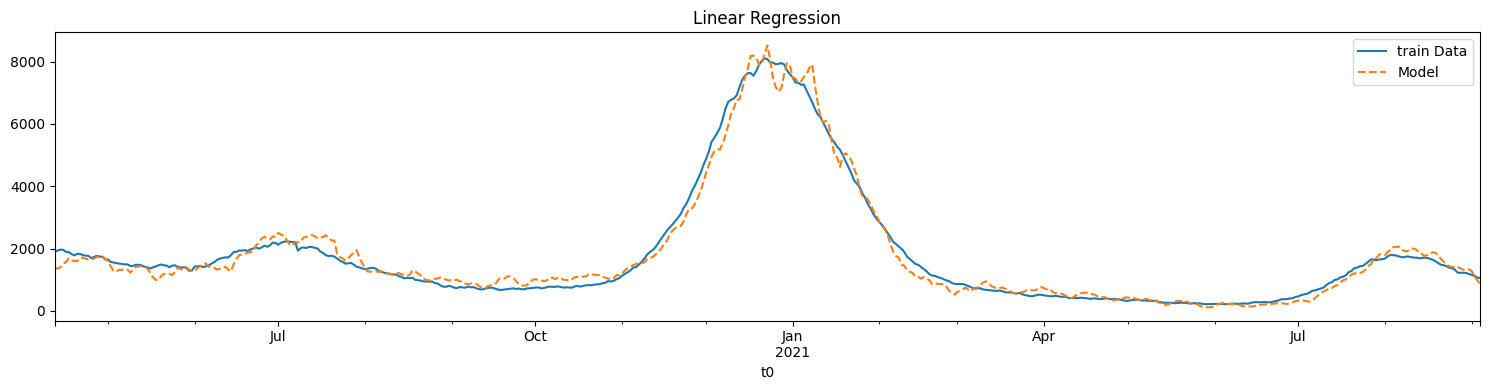

In [73]:
plt.figure(figsize=(15,4))
y_train.plot(label='train Data')
model_predict.plot(label = 'Model',style='--')

plt.title('Linear Regression')
plt.legend()
plt.tight_layout()
plt.savefig('LR DATAvsModel.png',dpi=900)

In [74]:
test_period = [i+ datetime.timedelta(days=14) for i in y_test.index]
predict_period = [i+ datetime.timedelta(days=14) for i in X_predict.index]

In [75]:
predict_test = pd.Series(lm.predict(X_test.drop(columns = ['s_FullVax_tn14_0','n_days_MajHol'])),
                        index = test_period)
predict_predict = pd.Series(lm.predict(X_predict.drop(columns = ['s_FullVax_tn14_0','n_days_MajHol'])),
                        index = predict_period)

update_y_test = pd.Series(y_test.values, index = test_period)

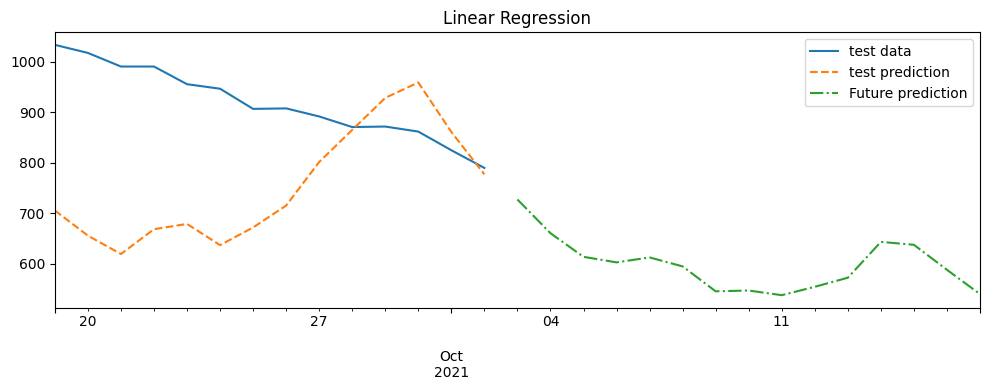

In [76]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
predict_test.plot(label='test prediction',style='--')
predict_predict.plot (label='Future prediction',style='-.')
plt.title('Linear Regression')
plt.legend()
plt.tight_layout()
plt.savefig('LR Test_Prediction.png',dpi=900)

# **Decision Tree**

In [77]:
X_train = day_df.loc['2020-04-12':'2021-08-31'].drop(columns=['t0','n_Hosp_t14'])
y_train = day_df.loc['2020-04-12':'2021-08-31'].n_Hosp_t14
X_test = day_df.loc['2021-09-01':'2021-09-14'].drop(columns=['t0','n_Hosp_t14'])
y_test = day_df.loc['2021-09-01':'2021-09-14'].n_Hosp_t14

In [78]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
import graphviz

In [79]:
dt = DecisionTreeRegressor(criterion=gridSearch.best_params_['criterion'],
                           splitter=gridSearch.best_params_['splitter'],
                           max_depth=gridSearch.best_params_['max_depth'],
                           min_samples_split = gridSearch.best_params_['min_samples_split'],
                           min_impurity_decrease = gridSearch.best_params_['min_impurity_decrease'])
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=50,
                      min_impurity_decrease=0.0005, min_samples_split=5,
                      splitter='random')

In [80]:
dt_model_predict = pd.Series(dt.predict(X_train),
                        index = y_train.index)

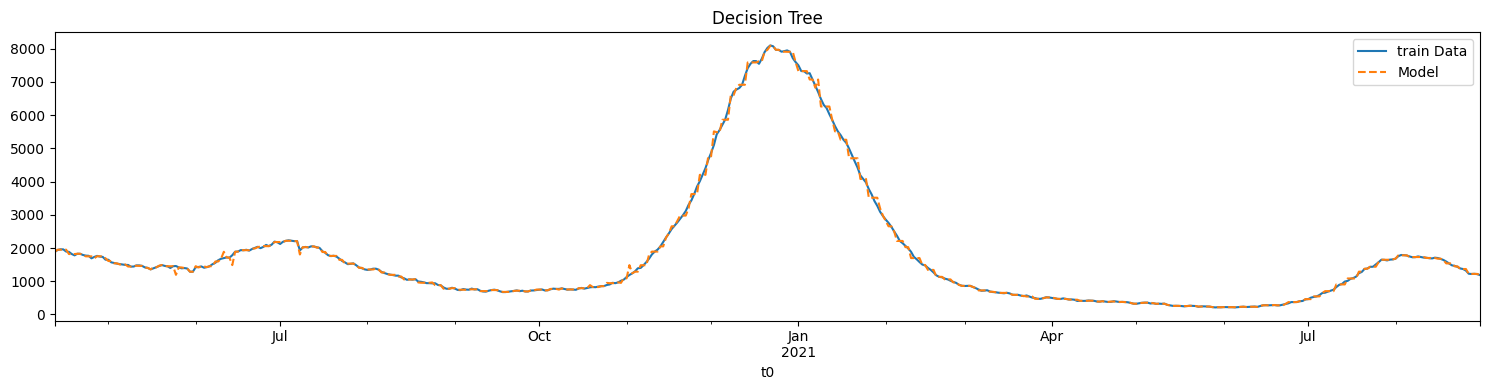

In [81]:
plt.figure(figsize=(15,4))
y_train.plot(label='train Data')
dt_model_predict.plot(label = 'Model',style='--')

plt.title('Decision Tree')
plt.legend()
plt.tight_layout()
plt.savefig('DT DATAvsModel.png',dpi=900)

In [82]:
dt_predict_test = pd.Series(dt.predict(X_test),
                        index = test_period)
dt_predict_predict = pd.Series(dt.predict(X_predict),
                        index = predict_period)

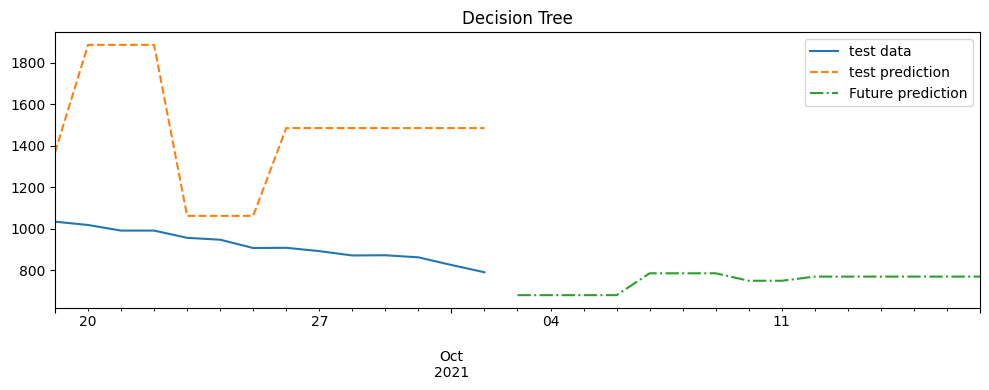

In [83]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
dt_predict_test.plot(label='test prediction',style='--')
dt_predict_predict.plot(label='Future prediction',style='-.')
plt.title('Decision Tree')
plt.legend()
plt.tight_layout()
plt.savefig('DT Test_Prediction.png',dpi=900)

# MLP

In [84]:
X_train = day_df.loc['2020-04-12':'2021-08-31'].drop(columns=['t0','n_Hosp_t14'])
y_train = day_df.loc['2020-04-12':'2021-08-31'].n_Hosp_t14
X_test = day_df.loc['2021-09-01':'2021-09-14'].drop(columns=['t0','n_Hosp_t14'])
y_test = day_df.loc['2021-09-01':'2021-09-14'].n_Hosp_t14

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes':[5,(5,5),(10,5),(5,10),(5,5,5),(5,10,5),(10,5,10)],
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','adam'],
    'learning_rate':['constant','invscaling','adaptive'],
    'max_iter':[200,500,1000,2000]}

gridSearch = GridSearchCV(MLPRegressor(), param_grid, cv=4,
                          scoring='neg_mean_squared_error',verbose=2)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

In [87]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=gridSearch.best_params_['hidden_layer_sizes'],
                   activation=gridSearch.best_params_['activation'],
                   learning_rate=gridSearch.best_params_['learning_rate'],
                   solver=gridSearch.best_params_['solver'],
                   max_iter=gridSearch.best_params_['max_iter'])
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 5, 10), learning_rate='invscaling',
             max_iter=2000, solver='lbfgs')

In [88]:
mlp_model_predict = pd.Series(mlp.predict(X_train),
                        index = y_train.index)

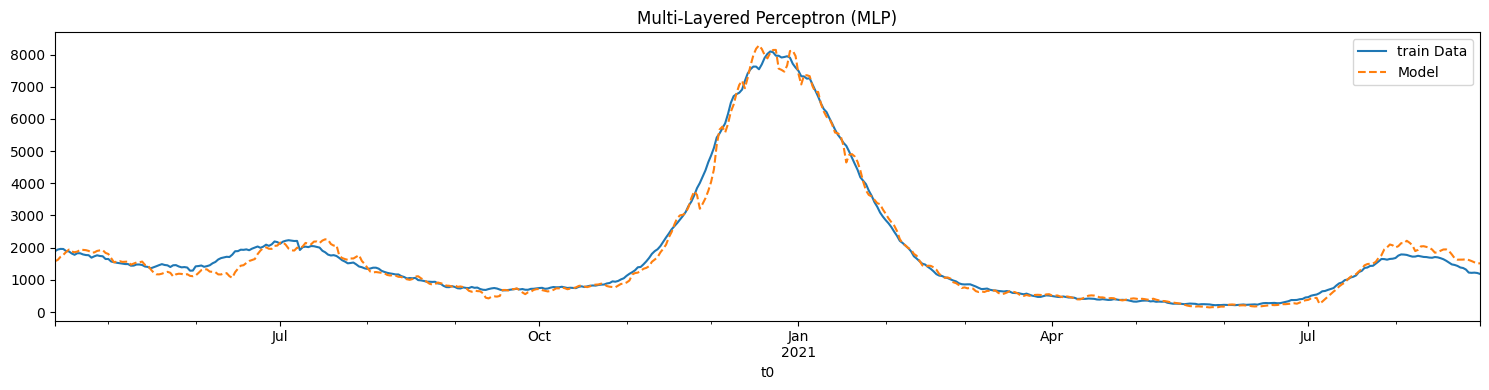

In [89]:
plt.figure(figsize=(15,4))
y_train.plot(label='train Data')
mlp_model_predict.plot(label = 'Model',style='--')

plt.title('Multi-Layered Perceptron (MLP)')
plt.legend()
plt.tight_layout()
plt.savefig('MLP DATAvsModel.png',dpi=900)

In [90]:
mlp_predict_test = pd.Series(mlp.predict(X_test),
                        index = test_period)
mlp_predict_predict = pd.Series(mlp.predict(X_predict),
                        index = predict_period)

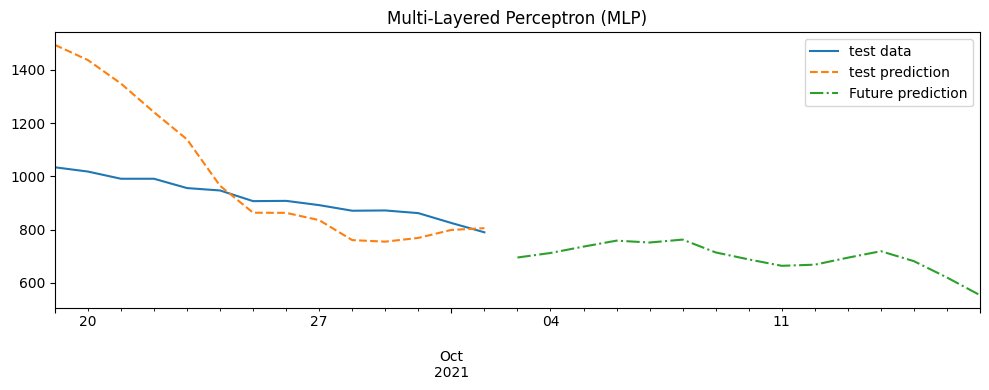

In [91]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
mlp_predict_test.plot(label='test prediction',style='--')
mlp_predict_predict.plot(label='Future prediction',style='-.')
plt.title('Multi-Layered Perceptron (MLP)')
plt.legend()
plt.tight_layout()
plt.savefig('MLP Test_Prediction.png',dpi=900)

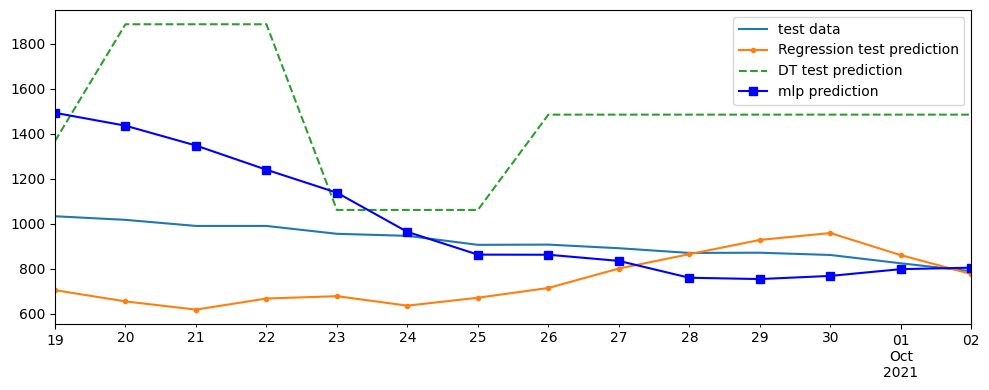

In [92]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
predict_test.plot(label='Regression test prediction',style='.-')
dt_predict_test.plot(label='DT test prediction',style='--')
mlp_predict_test.plot(label='mlp prediction',style='bs-')


plt.legend()
plt.tight_layout()
plt.savefig('Compare Test_Prediction.png',dpi=900)